In [13]:
!pip install google-play-scraper pandas matplotlib seaborn
!pip install wordcloud nltk

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, reviews_all
from datetime import datetime
import nltk
from wordcloud import WordCloud
import re

In [5]:
def scrape_app_reviews(app_id):
    try:
        # Get all reviews
        result = reviews_all(
            app_id,
            sleep_milliseconds=0,
            lang='id',
            country='ID'
        )

        # Convert to DataFrame
        df = pd.DataFrame(result)

        # Clean and process the data
        df['at'] = pd.to_datetime(df['at'])
        df['date'] = df['at'].dt.strftime('%Y-%m-%d')

        # Select and rename columns
        df_clean = df[[
            'userName',
            'date',
            'score',
            'content',
            'replyContent',
            'thumbsUpCount'
        ]].rename(columns={
            'userName': 'Nama_Pengguna',
            'date': 'Tanggal',
            'score': 'Rating',
            'content': 'Komentar',
            'replyContent': 'Balasan_Developer',
            'thumbsUpCount': 'Jumlah_Like'
        })

        return df_clean

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return None

# Scraping data
APP_ID = "com.akademi.crypto"
print("Mulai scraping reviews...")
df = scrape_app_reviews(APP_ID)

# Tampilkan informasi dasar
print("\nInformasi Dataset:")
print(f"Jumlah total review: {len(df)}")
print(f"Rating rata-rata: {df['Rating'].mean():.2f}")
print(f"Review dengan balasan developer: {df['Balasan_Developer'].notna().sum()}")

# Simpan ke CSV
filename = f"AkademiCrypto_reviews_{datetime.now().strftime('%Y%m%d')}.csv"
df.to_csv(filename, index=False, encoding='utf-8-sig')
print(f"\nData telah disimpan ke {filename}")

Mulai scraping reviews...

Informasi Dataset:
Jumlah total review: 1498
Rating rata-rata: 3.80
Review dengan balasan developer: 0

Data telah disimpan ke AkademiCrypto_reviews_20241221.csv


In [28]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Baca data yang sudah di-scrape sebelumnya
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Nama_Pengguna,Tanggal,Rating,Komentar,Balasan_Developer,Jumlah_Like,Panjang_Komentar,Bulan,Ada_Balasan,Sentiment
0,Lugu Alami,2024-12-19,5,Sukak aja dgan ilmu mreka,None,0,25,2024-12,False,Positif
1,Pejuang Kripto,2024-12-19,5,Awal mula mengenal kripto adalah dari bro tymo...,None,0,371,2024-12,False,Positif
2,Arief Nugroho Yusuf,2024-12-19,5,"Belajarrrrrrrrrr,invest,.,.semoga bisa pensiun...",None,0,83,2024-12,False,Positif
3,ahmad kalbadi,2024-12-19,5,Izin bagiamana cara mendaftar nya,None,0,33,2024-12,False,Positif
4,Kado ultah Cuyung 2023,2024-12-18,1,"Jangan join AC, ntar nyesel, bayar mahal, ilmu...",None,0,102,2024-12,False,Negatif


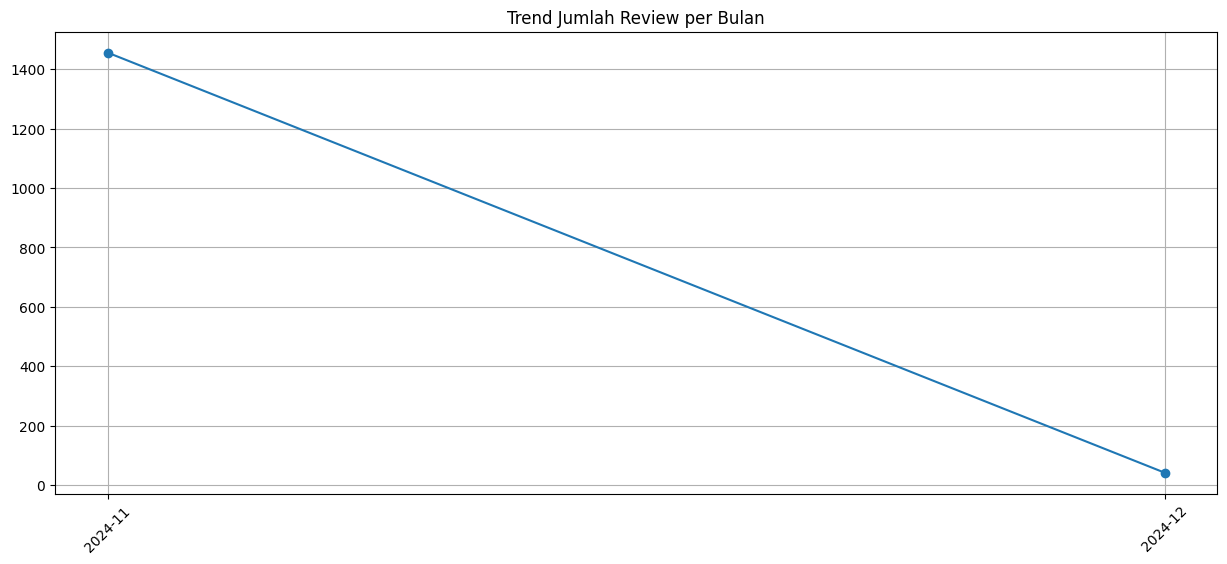

In [29]:
# 1. Analisis Waktu
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Bulan'] = df['Tanggal'].dt.strftime('%Y-%m')

# Plot trend review per bulan
monthly_reviews = df.groupby('Bulan').size().reset_index(name='Jumlah_Review')
plt.figure(figsize=(15, 6))
plt.plot(monthly_reviews['Bulan'], monthly_reviews['Jumlah_Review'], marker='o')
plt.title('Trend Jumlah Review per Bulan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

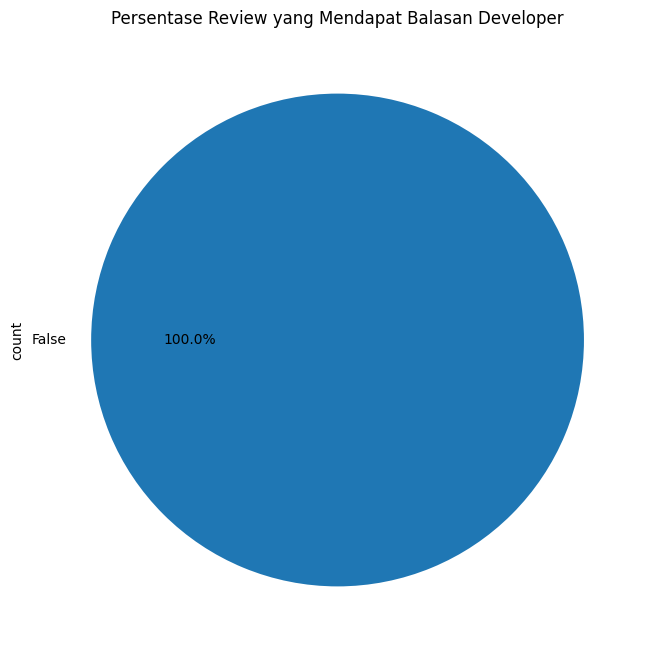

In [30]:
# 2. Analisis Respon Developer
df['Ada_Balasan'] = df['Balasan_Developer'].notna()

# Plot persentase review yang dibalas
plt.figure(figsize=(8, 8))
df['Ada_Balasan'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Review yang Mendapat Balasan Developer')
plt.show()

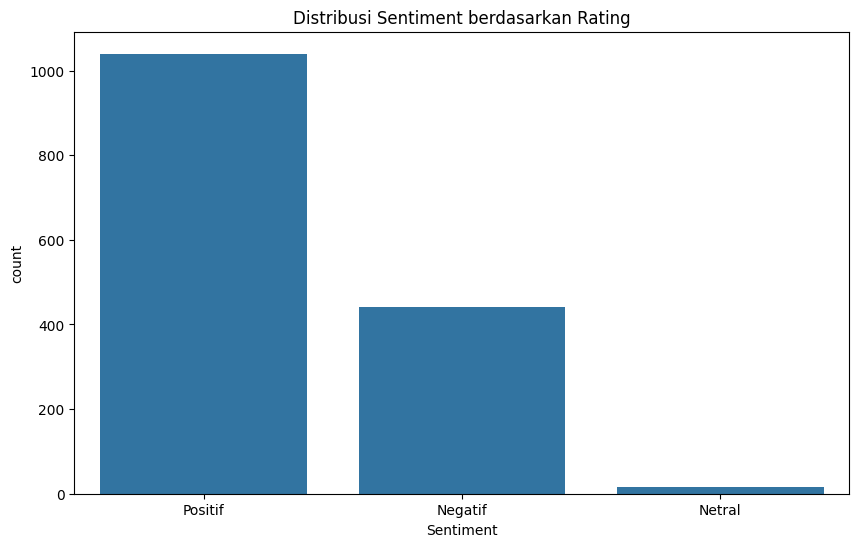

In [31]:
# 3. Analisis Sentiment berdasarkan Rating
def get_sentiment(rating):
    if rating >= 4:
        return 'Positif'
    elif rating == 3:
        return 'Netral'
    else:
        return 'Negatif'

df['Sentiment'] = df['Rating'].apply(get_sentiment)

# Plot distribusi sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment')
plt.title('Distribusi Sentiment berdasarkan Rating')
plt.show()

In [38]:
# Word Cloud untuk Review Positif (Hijau)
def create_positive_wordcloud(text):
    # Preprocessing text
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(text)
    text = ' '.join([w for w in word_tokens if w not in stop_words])

    # Membuat word cloud dengan warna hijau
    color_func = lambda *args, **kwargs: "green"
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        color_func=color_func,
        max_words=100
    ).generate(text)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Review Positif', size=15, pad=20)
    plt.show()

# Word Cloud untuk Review Negatif (Merah)
def create_negative_wordcloud(text):
    # Preprocessing text
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(text)
    text = ' '.join([w for w in word_tokens if w not in stop_words])

    # Membuat word cloud dengan warna merah
    color_func = lambda *args, **kwargs: "red"
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        color_func=color_func,
        max_words=100
    ).generate(text)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Review Negatif', size=15, pad=20)
    plt.show()


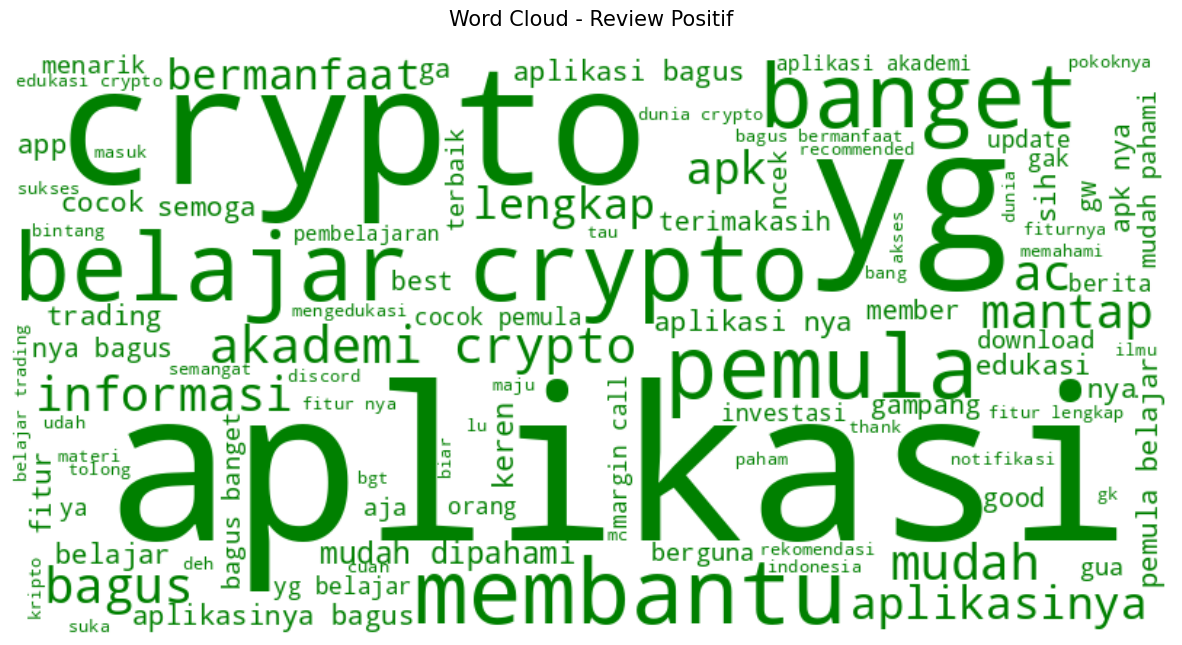

In [39]:
# Word Cloud Positif
positive_text = ' '.join(df[df['Sentiment'] == 'Positif']['Komentar'].dropna())
create_positive_wordcloud(positive_text)

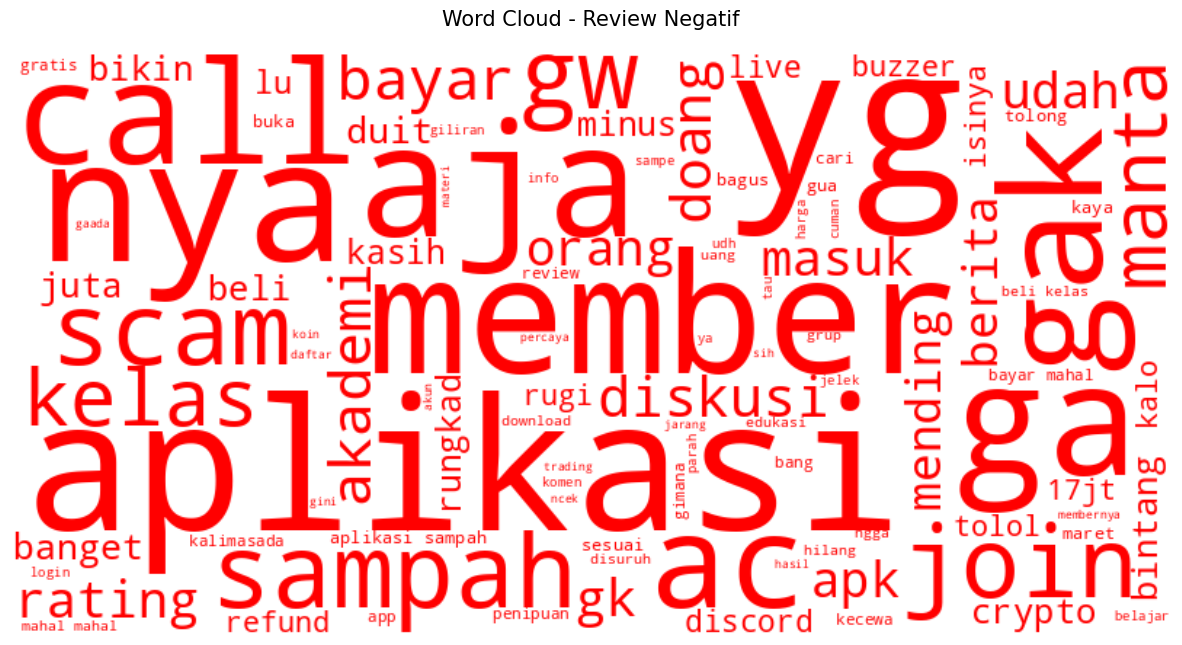

In [40]:
# Word Cloud Negatif
negative_text = ' '.join(df[df['Sentiment'] == 'Negatif']['Komentar'].dropna())
create_negative_wordcloud(negative_text)

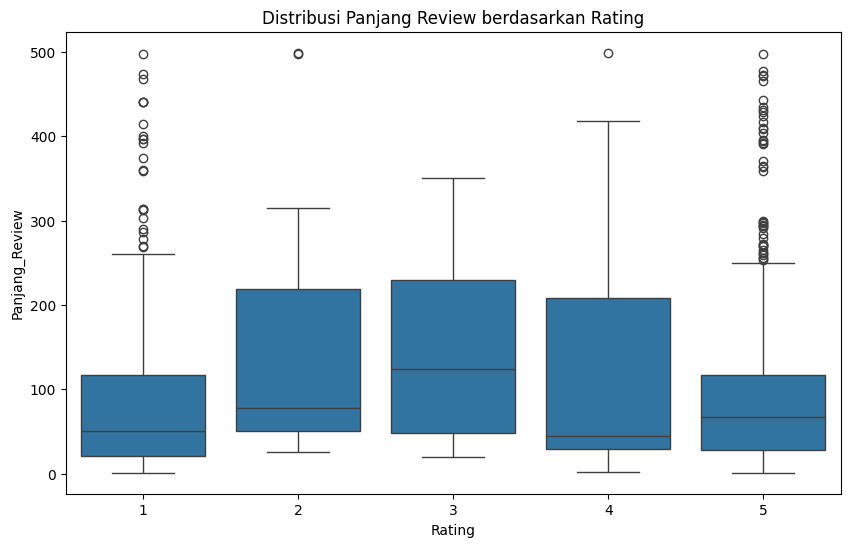

In [33]:
# 5. Analisis Panjang Review
df['Panjang_Review'] = df['Komentar'].str.len()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Panjang_Review', data=df)
plt.title('Distribusi Panjang Review berdasarkan Rating')
plt.show()

In [34]:
# 6. Statistik Lengkap
print("\nSTATISTIK LENGKAP ANALISIS")
print("-" * 50)
print(f"Total Review: {len(df)}")
print(f"Periode Review: {df['Tanggal'].min()} hingga {df['Tanggal'].max()}")
print(f"Rating Rata-rata: {df['Rating'].mean():.2f}")
print(f"Persentase Review Positif: {(df['Sentiment'] == 'Positif').mean()*100:.1f}%")
print(f"Persentase Review Negatif: {(df['Sentiment'] == 'Negatif').mean()*100:.1f}%")
print(f"Review dengan Balasan: {df['Ada_Balasan'].sum()} ({df['Ada_Balasan'].mean()*100:.1f}%)")



STATISTIK LENGKAP ANALISIS
--------------------------------------------------
Total Review: 1498
Periode Review: 2024-11-06 00:00:00 hingga 2024-12-19 00:00:00
Rating Rata-rata: 3.80
Persentase Review Positif: 69.4%
Persentase Review Negatif: 29.5%
Review dengan Balasan: 0 (0.0%)


In [35]:
# 7. Export hasil analisis
# Buat ringkasan per bulan
monthly_summary = df.groupby('Bulan').agg({
    'Rating': 'mean',
    'Ada_Balasan': 'mean',
    'Panjang_Review': 'mean',
    'Sentiment': lambda x: (x == 'Positif').mean()
}).round(3)

monthly_summary.columns = ['Rating_Rata2', 'Rasio_Balasan', 'Panjang_Review_Rata2', 'Rasio_Sentiment_Positif']
monthly_summary.to_csv('analisis_bulanan.csv')

print("\nHasil analisis bulanan telah disimpan dalam file 'analisis_bulanan.csv'")


Hasil analisis bulanan telah disimpan dalam file 'analisis_bulanan.csv'


In [36]:
# 8. Tips dan Rekomendasi
print("\nREKOMENDASI BERDASARKAN ANALISIS:")
print("-" * 50)

# Rating trends
recent_rating = df.sort_values('Tanggal').tail(100)['Rating'].mean()
overall_rating = df['Rating'].mean()

if recent_rating < overall_rating:
    print("⚠️ Tren rating menurun dalam 100 review terakhir")
else:
    print("✅ Tren rating stabil atau meningkat")

# Response rate
response_rate = df['Ada_Balasan'].mean()
if response_rate < 0.5:
    print("⚠️ Tingkat respons developer perlu ditingkatkan")
else:
    print("✅ Tingkat respons developer baik")

# Negative reviews
recent_negative = df[df['Sentiment'] == 'Negatif'].sort_values('Tanggal').tail(10)
if not recent_negative.empty:
    print("\nTop Keluhan Terbaru:")
    for idx, row in recent_negative.iterrows():
        print(f"- {row['Komentar'][:100]}...")


REKOMENDASI BERDASARKAN ANALISIS:
--------------------------------------------------
⚠️ Tren rating menurun dalam 100 review terakhir
⚠️ Tingkat respons developer perlu ditingkatkan

Top Keluhan Terbaru:
- Gimana nih udh masukin email Sama pw tetep gk bisa...
- AC = Academy Crypto Scam, from Indonesia all of them AVS and Timothi only pump dan dump, many member...
- Teruntuk yang blm jadi member, baca ketikan gw ini agar kalian selamat, gausah bayar member atau joi...
- harganya mahal tapi analisa marketnya ga jelas slaah mulu,materinya cuma basic. ga ada ilmu advance ...
- Rating akan dirubah kalau sudah ada live session kembali, chat antar member dan fitur-fitur seperti ...
- suck...
- 👍...
- Jujur gw member di dalem ini , gw dulu join karna di janjiin ada live exclusive member dan ada disku...
- Cara loginnya gimana?😂 Apakah harus bayar?...
- Jangan join AC, ntar nyesel, bayar mahal, ilmu tidak daging, jarang call, sekali call nyangkut, wkwk...
